# HANDS ON MACHINE LEARNING: LINEAL REGRESION

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn import preprocessing
from sklearn import metrics

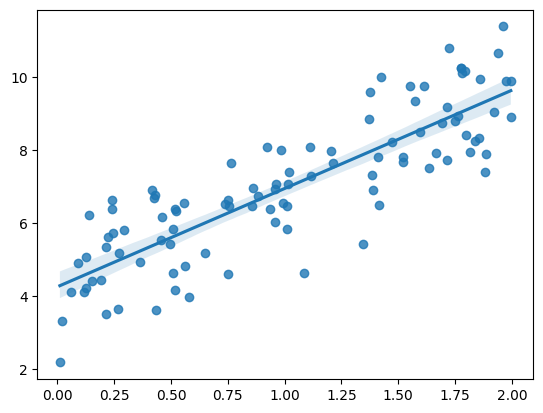

In [13]:
x=2*np.random.rand(100,1) #rand: numeros entre 0 y 1. (100,1): dimension
y=4+3*x+np.random.randn(100,1) #el ultimo elemento genera ruido
#plt.scatter(x,y)
sns.regplot(x=x, y=y);

## The Normal Equation

The general equation of a lineal regression:
$$ y= \theta_{0} + \theta_{1}x_{1}+ \theta_{2}x_{2}+ ... + \theta_{n}x_{n}= \mathbf{\theta} \cdot \mathbf{x} $$

To find the value of $\theta$ that minimizes the cost function we use the normal equation. $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function and y is the vector of target values.

$$\hat{\theta}=(X^{T}X)^{-1}X^{T}\mathbf{y}$$

> np.linalg: modulo de aljebra lineal de numpy.
>
> np.linalg.inv(): inversa
>
> .dot: multiplicación de matrices

In [40]:
#Datos de prueba generados de manera aleatoria.
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

#Creamos la matrix X y los theta.
X_b=np.c_[np.ones((100,1)),X] #agrega una columna de unos a la matriz X
theta_test=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_test

array([[4.0356933 ],
       [2.95307483]])

In [42]:
#Con la ecuacion creada predecimos nuevos parametros
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_test)
y_predict

array([[4.0356933 ],
       [9.94184296]])

(0.0, 2.0, 0.0, 15.0)

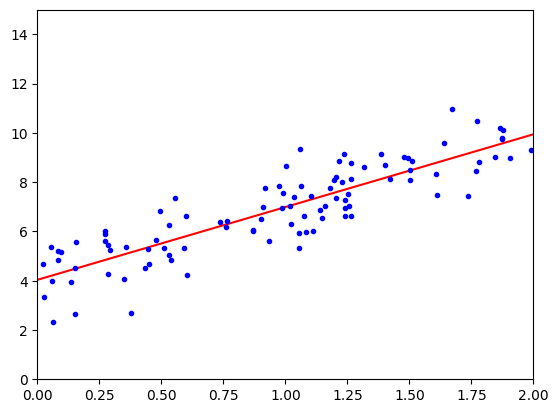

In [43]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

## Whith Scikit-Learn

In [46]:
#Datos. A y le hemos metido ruido.
X=2*np.random.rand(400,1)
y=4+3*X+np.random.randn(400,1)

x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=20, random_state=20)

regresion=LinearRegression()
regresion.fit(x_train,y_train)

regresion.intercept_, regresion.coef_

(array([4.12583285]), array([[3.24398832]]))

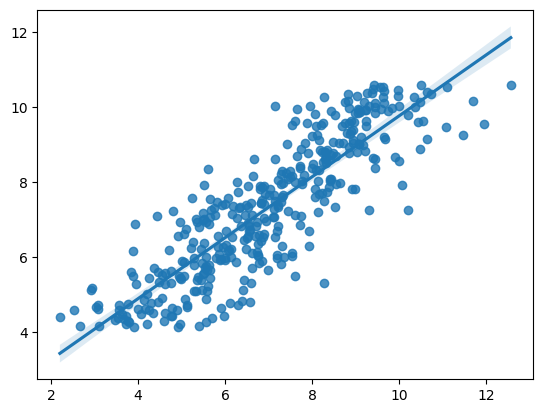

In [54]:
predictions=regresion.predict(x_test)
#sns.scatterplot(x=x_test, y=predictions);
sns.regplot(x=y_test, y=predictions);